# Visualización de valores faltantes

### Importando librerías

Hemos aprendido a tabular valores faltantes, sin embargo nos hemos dado cuenta que una tabla no siempre es la mejor opción.

Es aquí cuando la visualización de valores faltantes entra en juego.

Al inicio podriamos hacer este tipo de visualizaciones, es decir que represente el número de valores faltantes por cada una de mis variables.

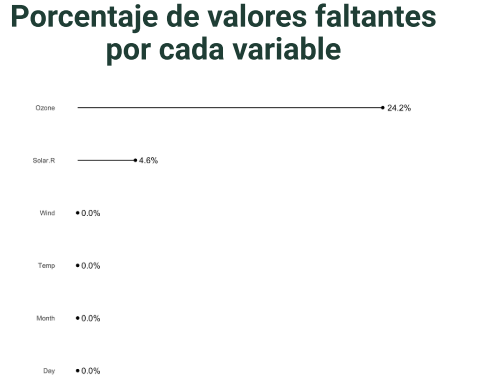

Recuerda que tenemos una función que hace esto en forma de tabla, es decir tenemos el porcentaje por cada variable con su respectivo porcentaje de valores faltantes.

Así esto nos permite verlo de una manera sencilla y rápida, pero llegará el momento en que una tabla no será tan útil y no me ayudara a encontrar lo que estoy buscando por ejemplo.

Queremos saber la aparición de valores que coincidan (aparezcan conjuntamente), es decir; que si yo tengo un valor faltante en esta variable, también lo tengo en otra variable y en otra diferente, es aquí cuando un upsetplot nos ayudará, ya que establece diferentes conjuntos de datos y su relación.

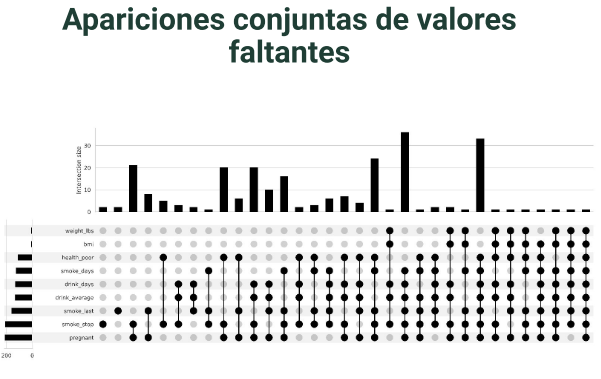

Por ejemplo cada punto de color negro representa que ciertos valores faltantes están en dichas variables. Y las barras superiores nos indican con que frecuencia, de esta manera podemos ver que ciertas variables están relacionadas y tienen una alta frecuencia de valores faltantes. De esta manera podemos encontrar patrones de una manera sencilla y dinámica.

## Usando riskfactors

### Importando librerías

In [1]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Configurar el aspecto general de las gráficas del proyecto

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

### Leer conjunto de datos

In [3]:
#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [4]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


### Correr missing-extension

In [5]:
#Correr extension de Pandas nuevav2
%run pandas-missing-extension-re2.py

### Explorando los datos de forma gráfica
#### Variable / Columnas

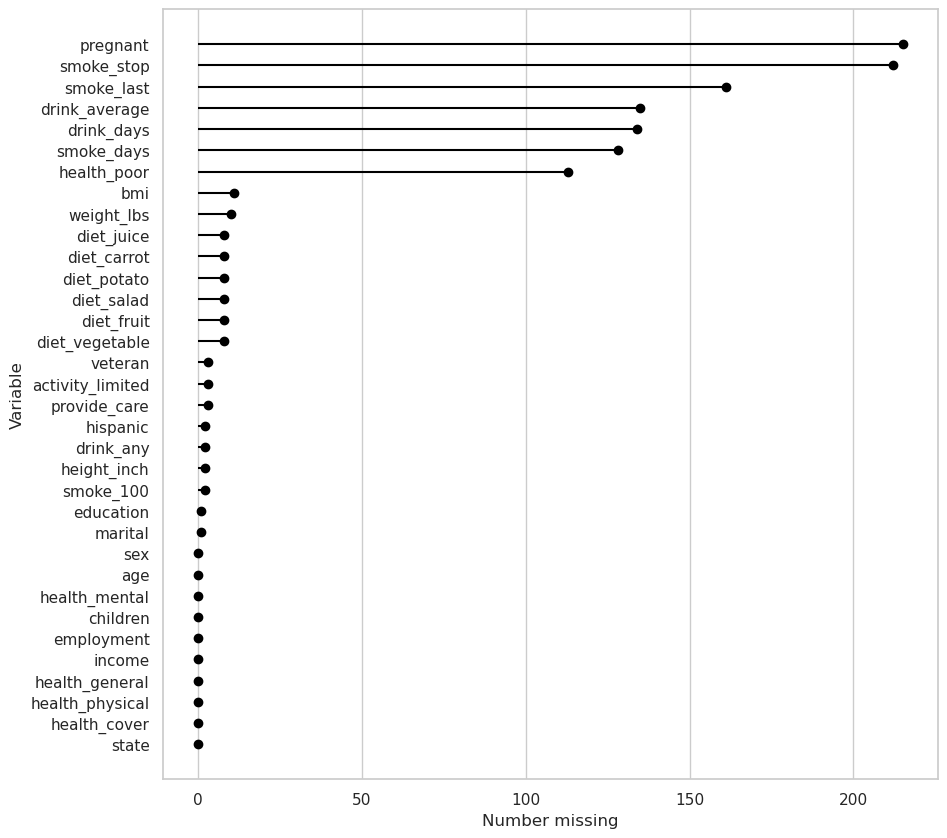

In [6]:
riskfactors_df.missing.missing_variable_plot()

Como se puede observar en la gráfica anterior hay ciertas variables que tienen un número alto en coincidencias de valores faltantes.

* pregnant
* smoke stop
* smoke last
* drink average
* drink days
* smoke days
* health poor

Podemos explorar un poco más por contexto y sobre como están relacionadas las variables.

Ahora haremos una gráfica para las observaciones o filas.

#### Observaciones / Filas

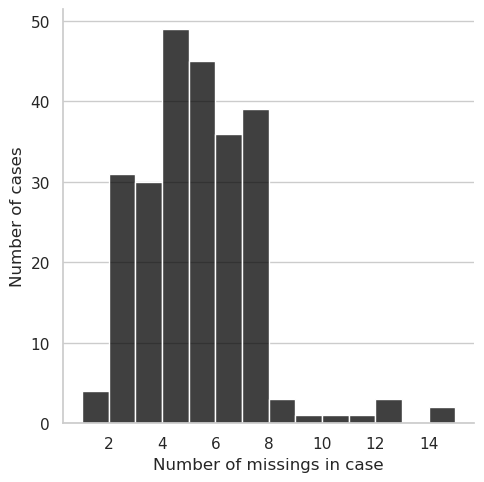

In [7]:
riskfactors_df.missing.missing_case_plot()

En el eje `X` podemos ver el número de columnas que poseen valores faltantes y en el eje `Y` su frecuencia o el número de casos / observaciones que coinciden con el número de columnas correspondiente.

Aquí podemos ver cuantas columnas tienen mayor prominencia de valores faltantes.

Apoyémonos del ``Span``

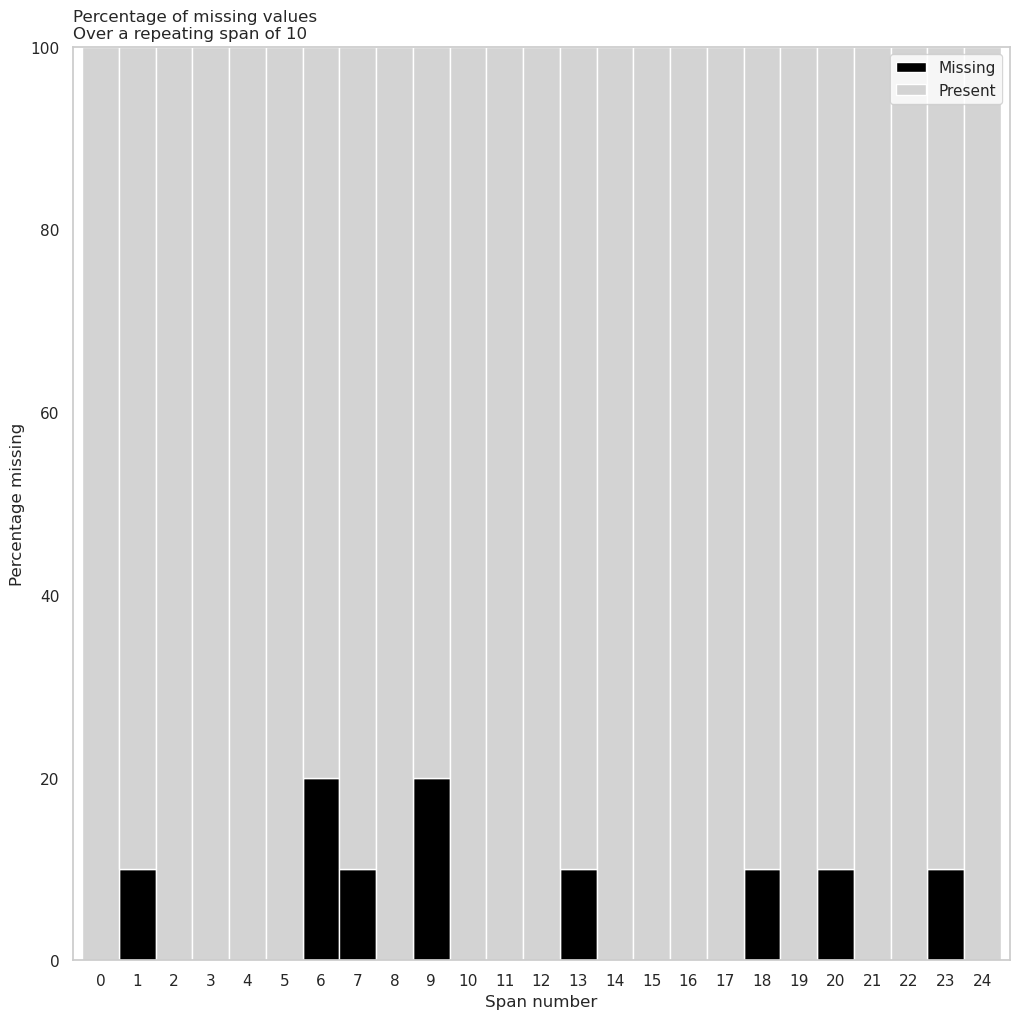

In [9]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable='weight_lbs',
        span_every=10,rot=0
        )
)

Aquí tenemos que cada columna tiene un máximo de 10 observaciones como lo hemos ajustado en la celda de código, podemos ver que hay varios `span` que no tienen valores faltantes y por otro lado tenemos otros en los que tienen alrededor del 10% o 20% de valores faltantes. De nuevo aquí con esta herramienta podemos apreciar que en ciertas areas hay un incremento de valores faltantes.

## Missingno

Tenemos una libraría para valores faltantes, indaguemos un poco en ella.

<AxesSubplot:>

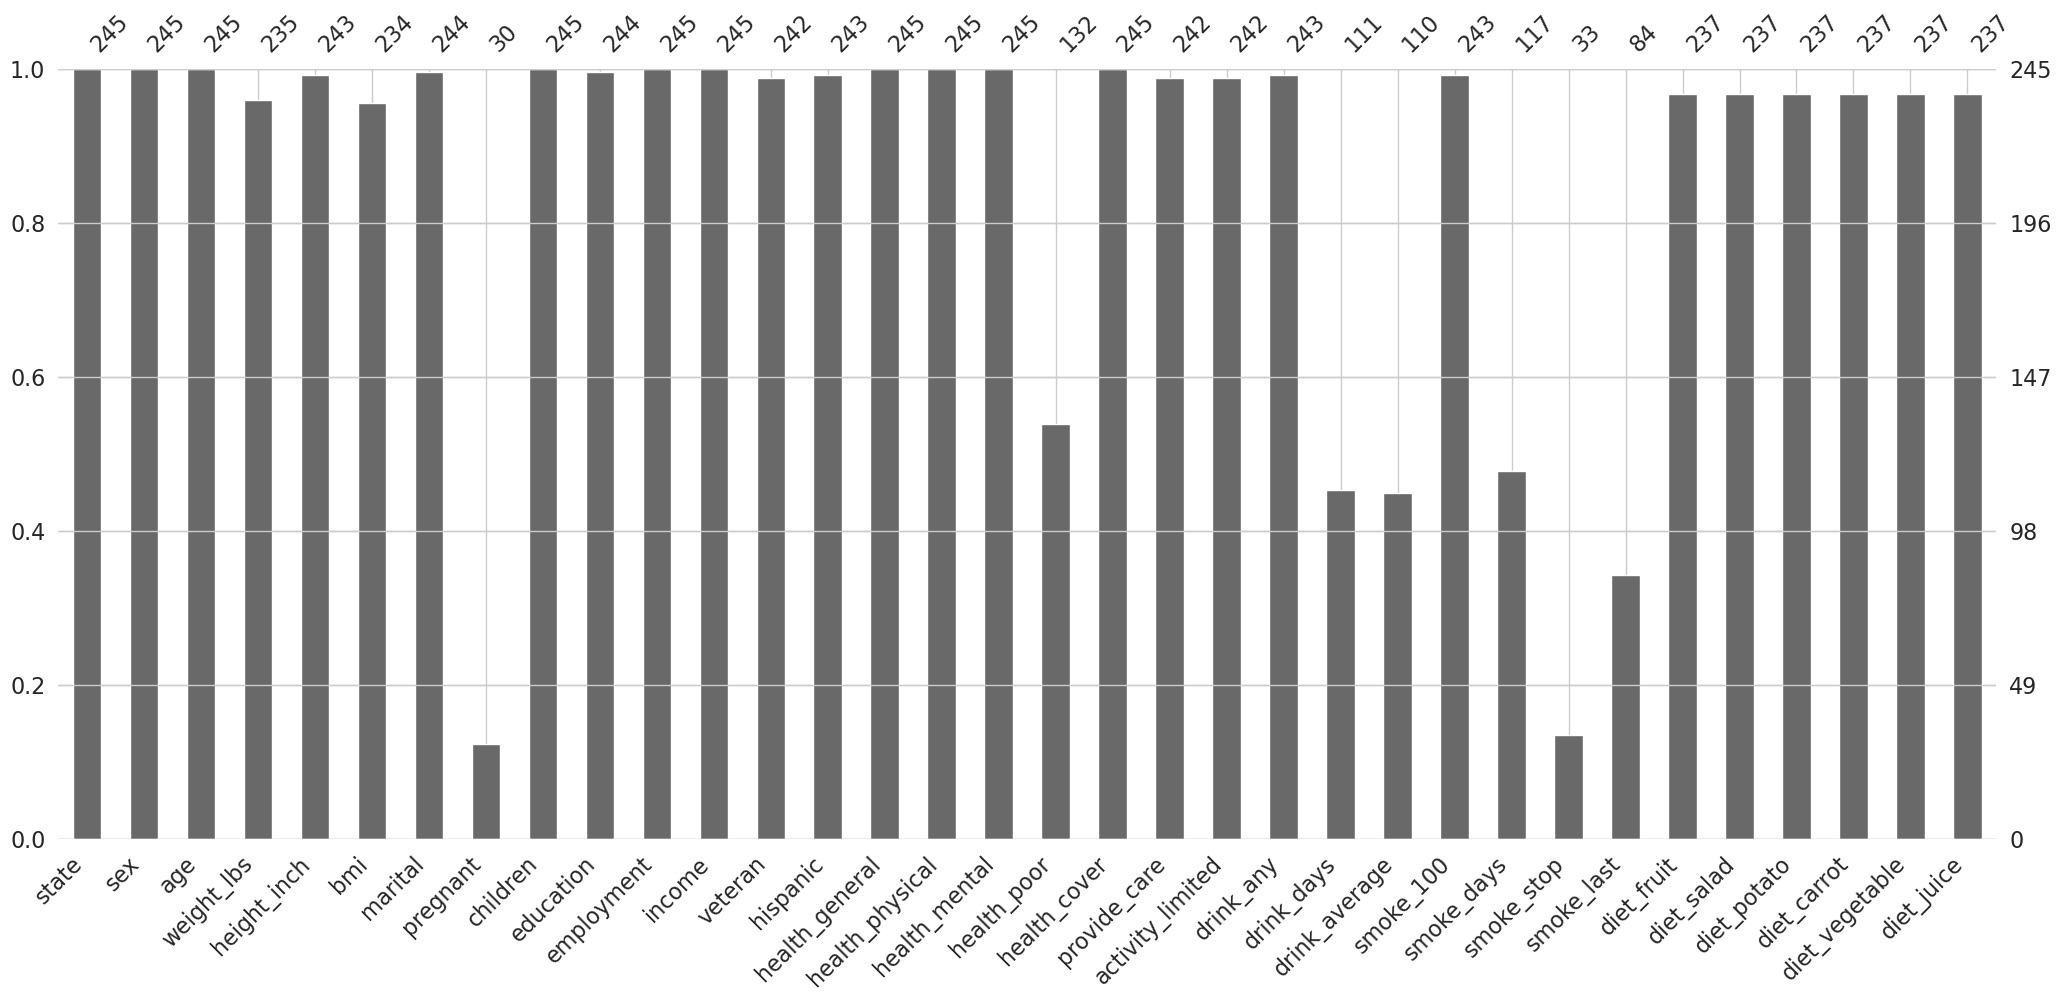

In [10]:
missingno.bar(df=riskfactors_df)

<AxesSubplot:>

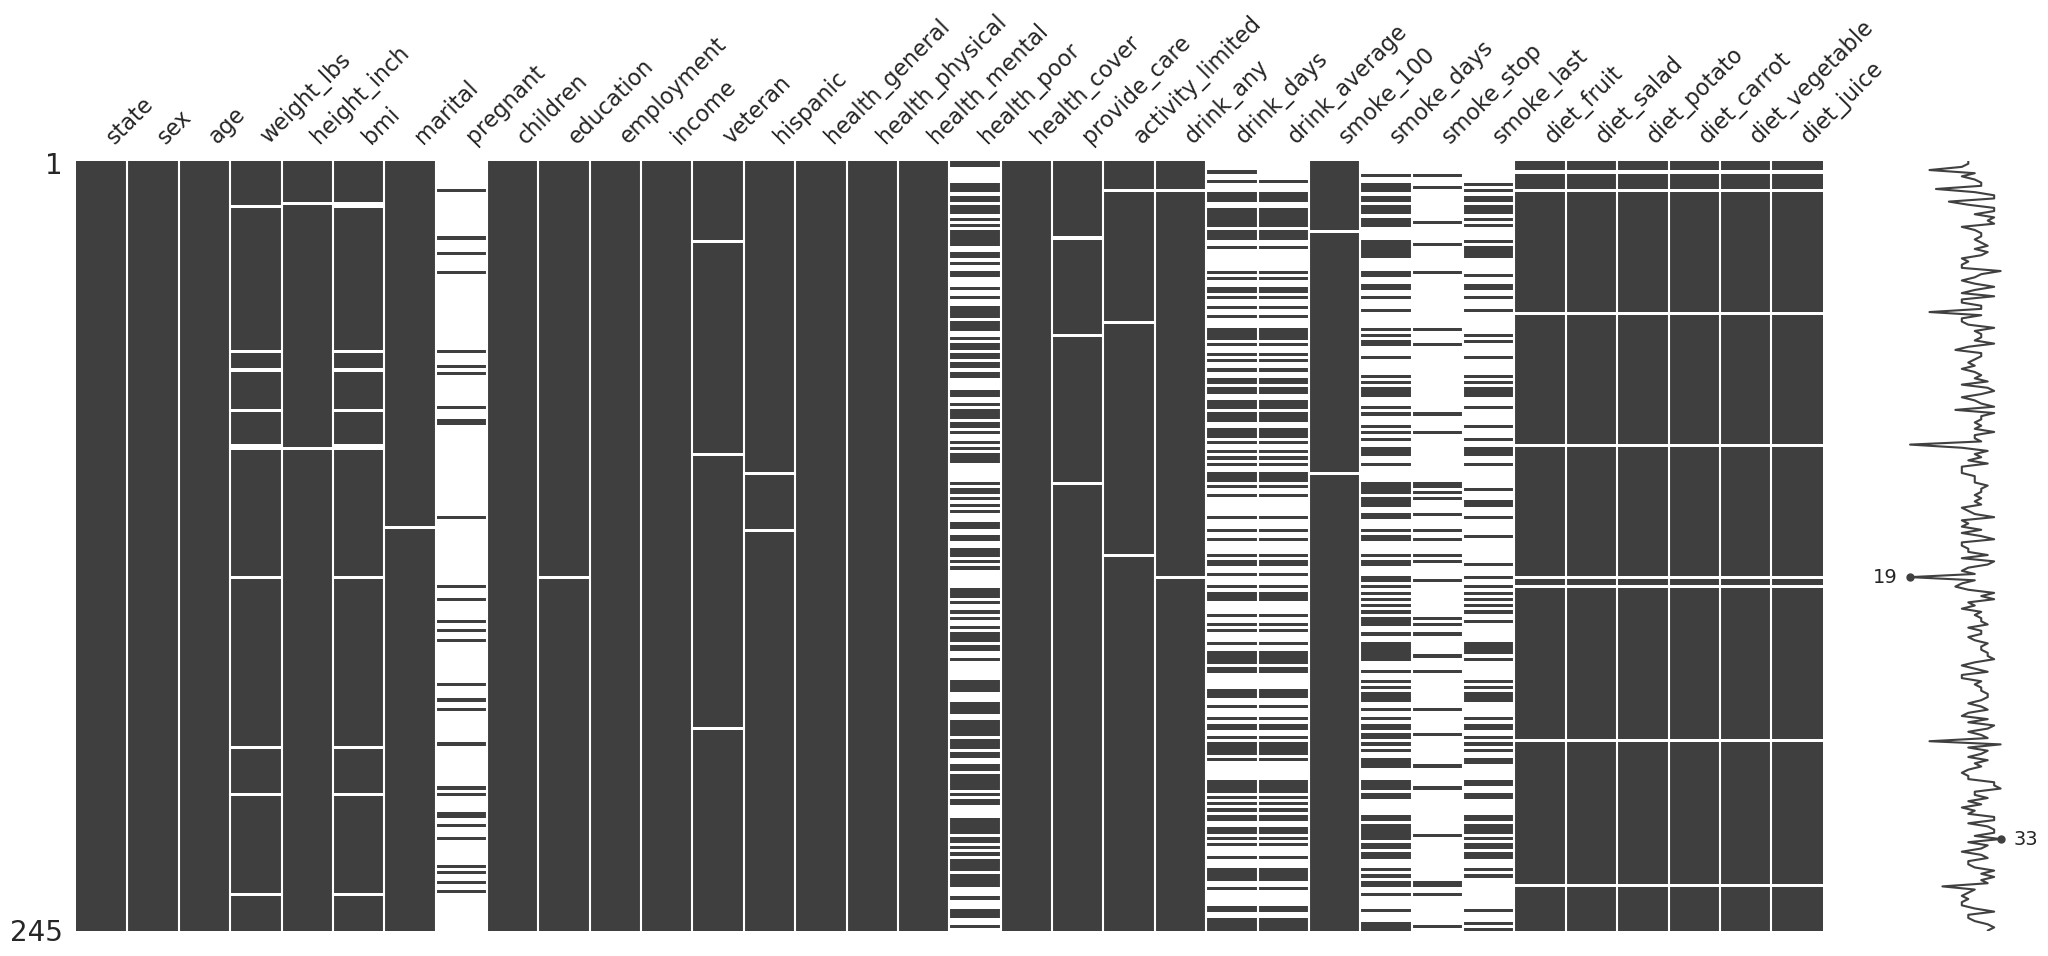

In [11]:
missingno.matrix(df=riskfactors_df)

Aquí en este tipo de visualización ya estamos viendo los **picos de valores faltantes en el lado derecho de la gráfica**, lo que significa que:

* **color negro**: existen valores
* **color blanco**: no existen valores o hay valores nulos.
  
Entonces podemos ver en nuestro conjunto de datos que hay ciertas zonas donde hay valores y ciertas zonas donde no lo hay. 

Entonces en la zona derecha me da una información visual con picos en zonas o **filas / observaciones** donde se acumula este comportamiento de valores faltantes, por lo tanto podemos comenzar a explorar estas relaciones entre nuestras variables y observaciones.

/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/upsetplot/plotting.py:781: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/upsetplot/plotting.py:782: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

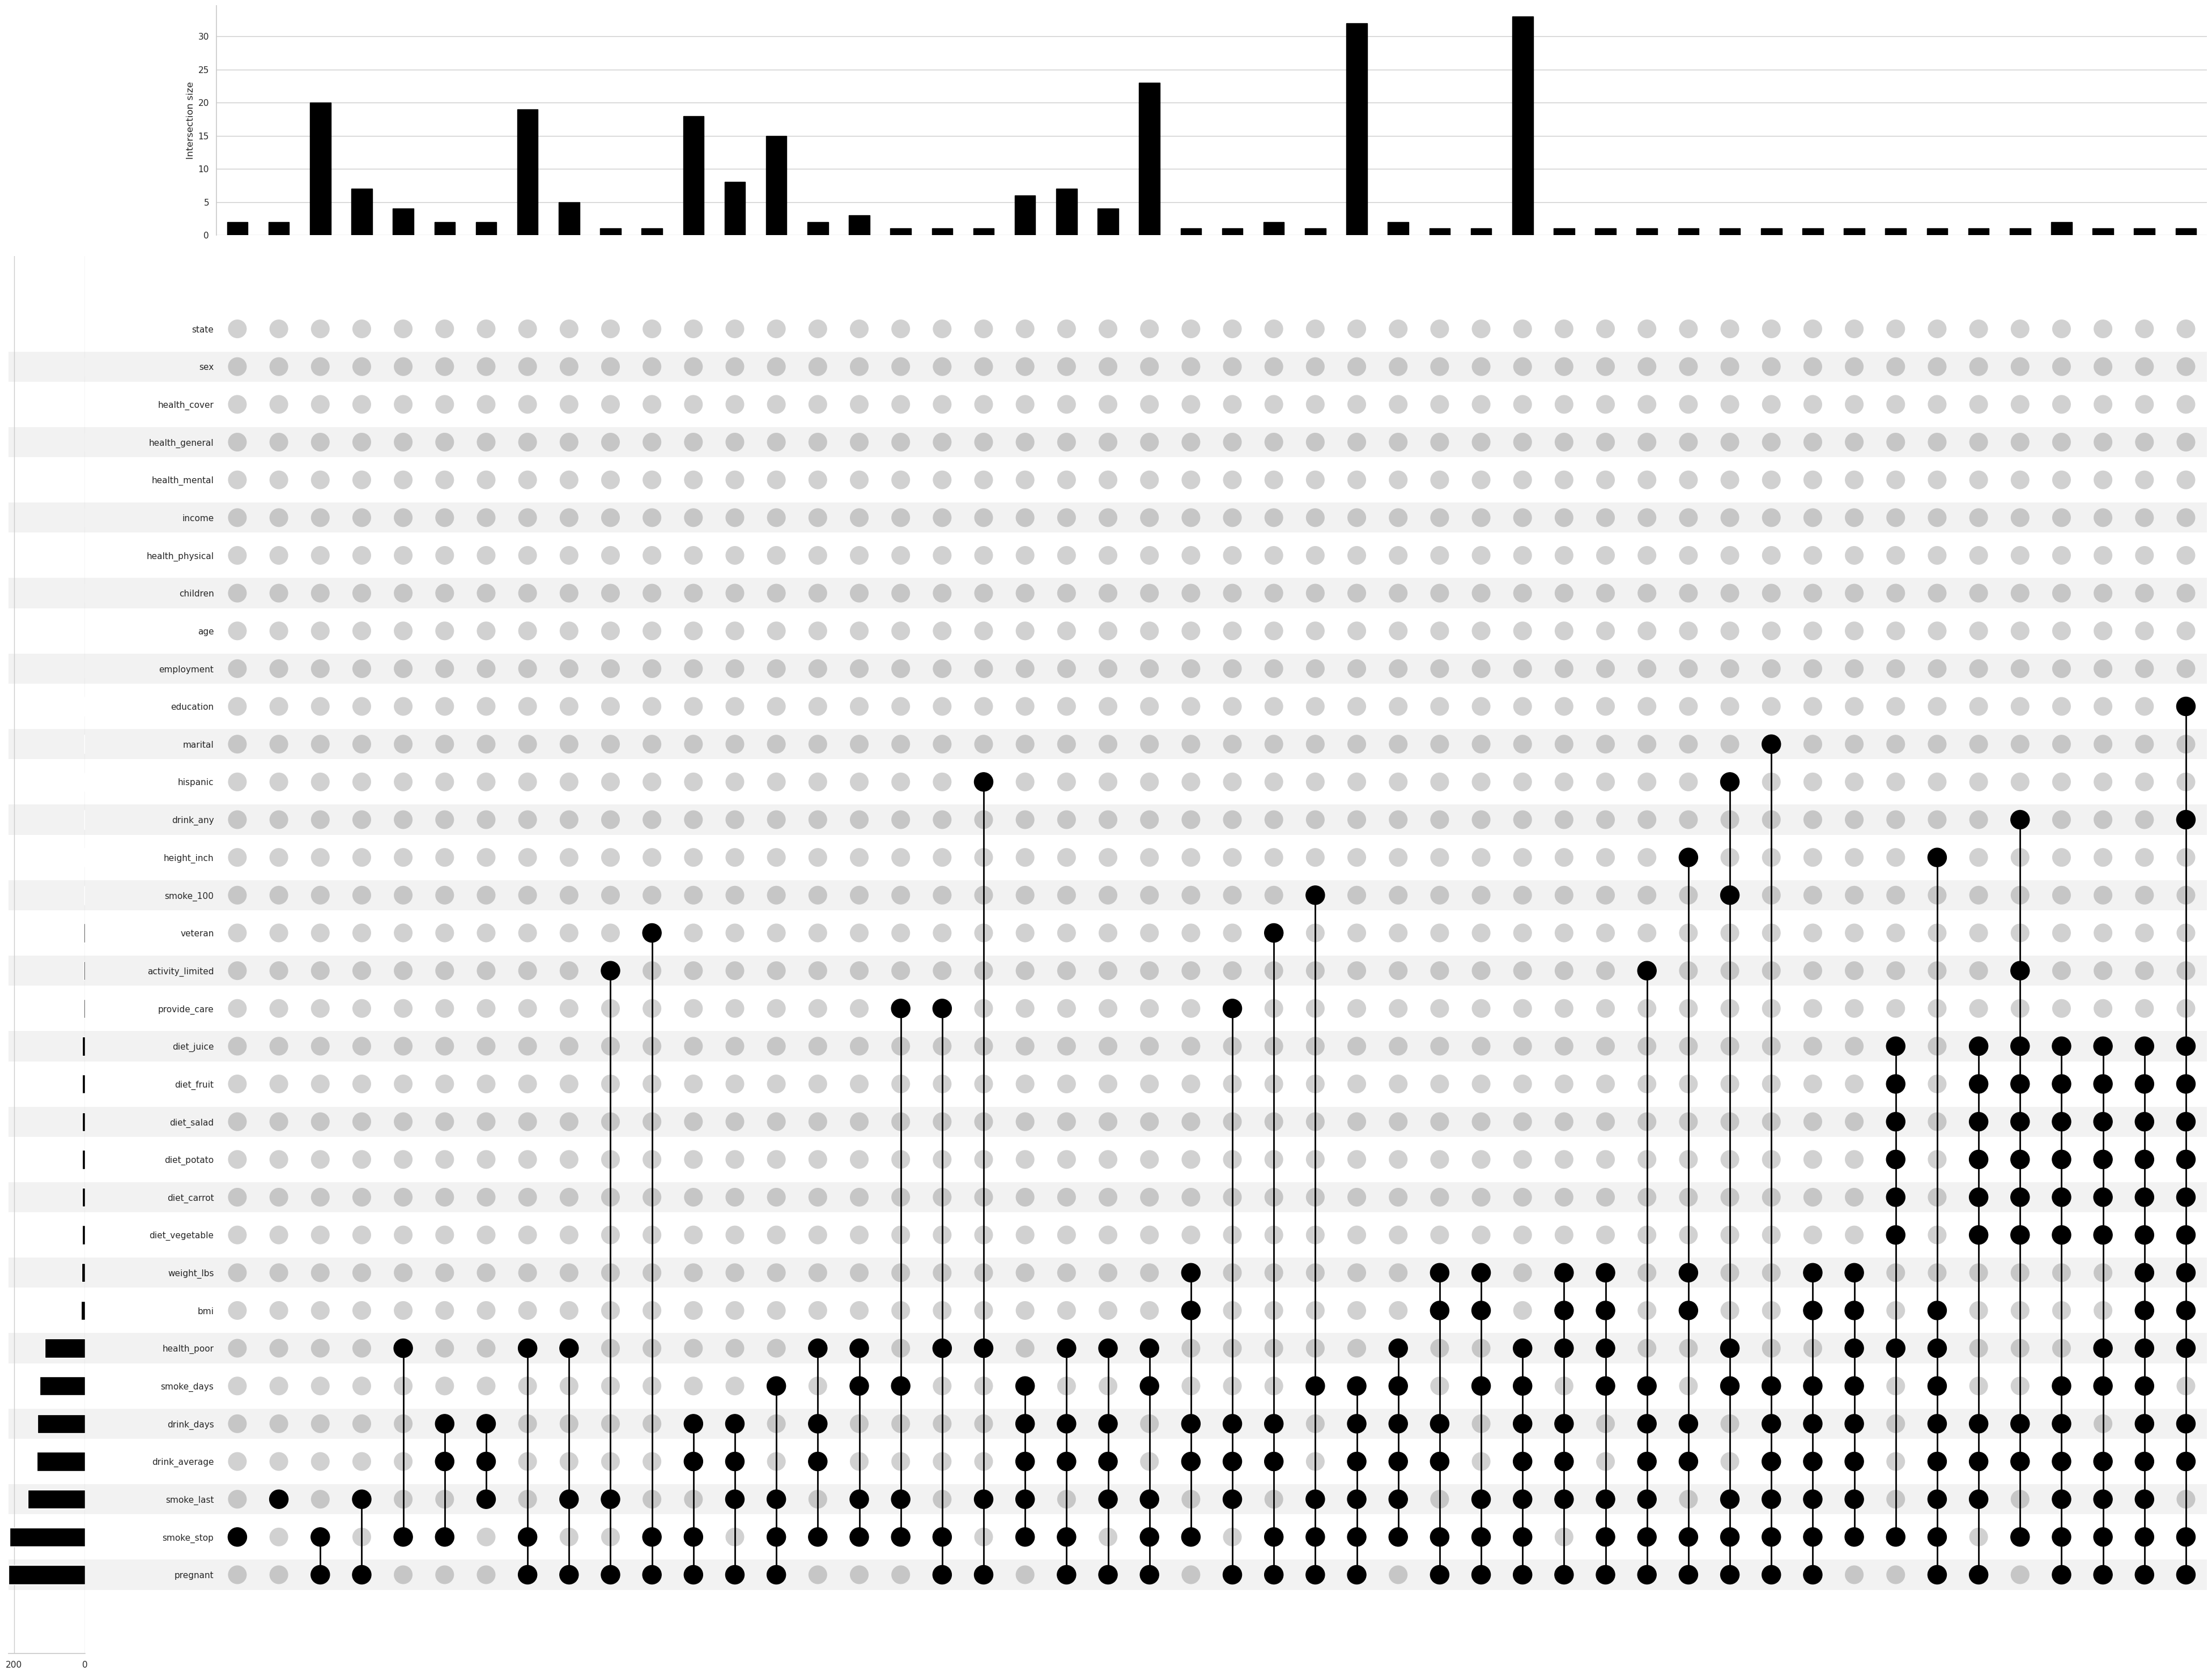

In [12]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=None,
        element_size=68
    )
)

Con el argumento `variables=None` me gráfica todas las variables.

Como se puede ver en la gráfica anterior tenemos ciertas variables que no tienen valores faltantes. Nos da las coincidencias de los valores que hay.

Como la gráfica es demasiado grande vamos a filtrar por unas variables.

/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/upsetplot/plotting.py:781: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/dens/miniforge3/envs/deteccion/lib/python3.9/site-packages/upsetplot/plotting.py:782: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

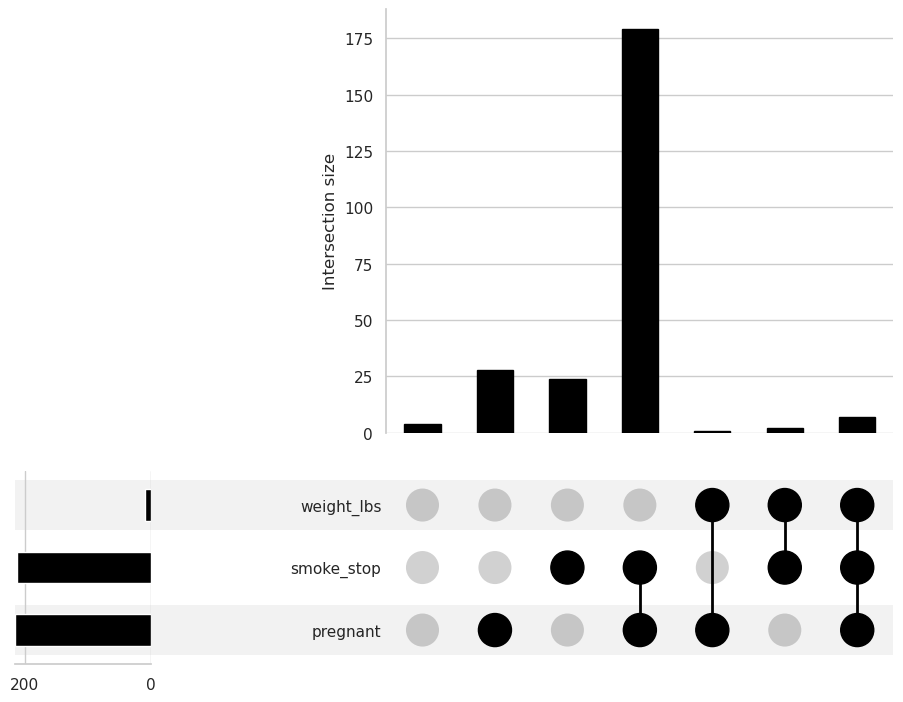

In [13]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant','weight_lbs','smoke_stop'],
        element_size=68
    )
)

Se convierte en una gráfica mas sencilla de visualizar y vemos que por ejemplo hay muy pocas observaciones que comparten estas 3 variables.

Pero como se puede ver para el caso de `smoke_stop` y `pregnant` hay un gran número de observaciones / filas que coinciden en valores faltantes. Entonces algo está pasando ahí o algo va a pasar ahí y sería necesario que lo exploraremos para identificar lo que sucede.

Recordemos que siempre hay que aprender y cualquier tipo de visualización también las podemos aplicar a valores faltantes. Incrementando así las herramientas para identificar donde se encuentra los valores faltantes y ¿por qué se encuentran ahí?


## Extras
- [Missingno](https://github.com/ResidentMario/missingno)
- [Missing Python Library](https://www.youtube.com/watch?v=Wdvwer7h-8w&t=523s)